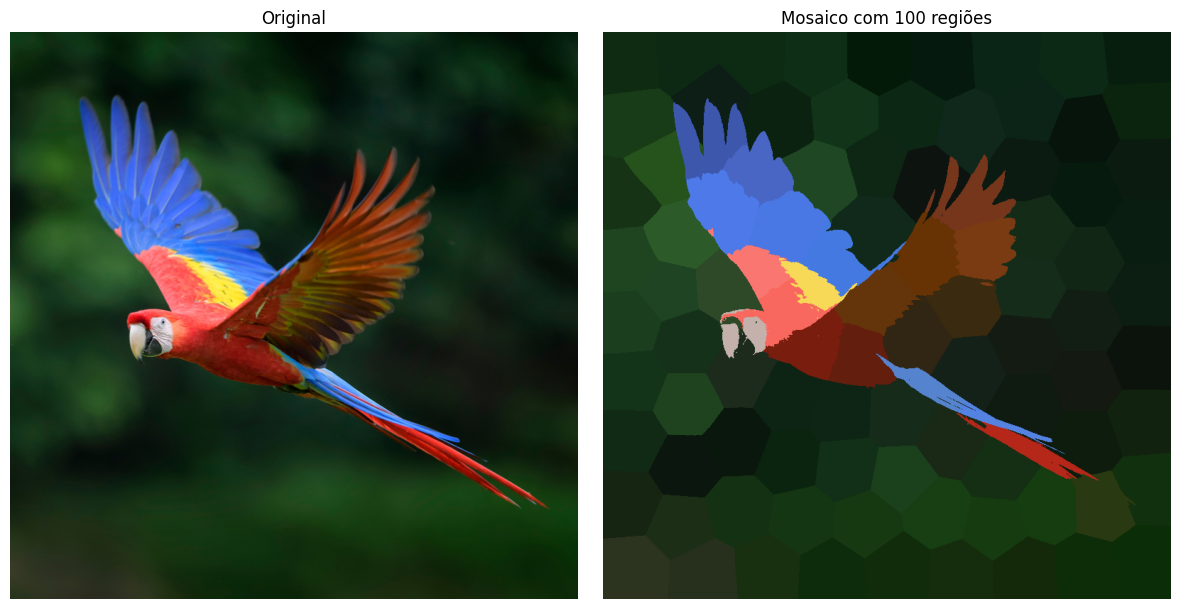

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# --- Carregar imagem ---
image_path = "arara.png"
img = Image.open(image_path).convert("RGB")
img_np = np.array(img)
h, w, c = img_np.shape

# --- Criar grid de coordenadas (x, y) ---
x_coords, y_coords = np.meshgrid(np.arange(w), np.arange(h))
coords = np.stack([y_coords, x_coords], axis=2)  # shape (h, w, 2)

# --- Juntar cor + posição ---
features = np.concatenate([img_np, 2*coords], axis=2).reshape(-1, 5)

# --- KMeans com posição + cor ---
k = 100  # número de blocos/cores (ajuste para + ou - detalhes)
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(features)
centroids = kmeans.cluster_centers_[:, :3].astype(np.uint8)  # só a parte RGB

# --- Montar imagem quantizada ---
quantized_pixels = centroids[labels]
quantized_img = quantized_pixels.reshape(h, w, 3)

# --- Mostrar ---
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(img_np)
axs[0].set_title("Original")
axs[0].axis("off")

axs[1].imshow(quantized_img)
axs[1].set_title(f"Mosaico com {k} regiões")
axs[1].axis("off")

plt.tight_layout()
plt.show()
